In [61]:
#! pip install spacy
#! pip install wordcloud

In [37]:
import spacy
import re

In [44]:
nlp = spacy.load("en_core_web_sm")
with open("C:/Users/04-02/Desktop/kdy/Steve Jobs.txt", 'r', encoding='utf-8') as file:
    text = file.read()
# 텍스트에서 영어 알파벳과 공백을 제외한 모든 문자를 공백으로 대체
clean_text = re.sub('[^a-zA-Z\s]', ' ', text)
doc = nlp(clean_text)
nouns = [token.text for token in doc if token.pos_ == 'NOUN']

In [49]:
print(nouns)

['page', 'title', 'title', 'date', 'date', 'url', 'url', 'text', 'businessman', 'designer', 'inventor', 'co', 'founder', 'chairman', 'officer', 'pioneer', 'computer', 'revolution', 'career', 'computer', 'consumer', 'electronics', 'fields', 'executive', 'member', 'board', 'directors', 'co', 'founder', 'lines', 'computers', 'series', 'potential', 'PARC', 'mouse', 'user', 'interface', 'creation', 'year', 'period', 'efforts', 'desktop', 'revolution', 'introduction', 'software', 'power', 'struggle', 'board', 'directors', 'computer', 'platform', 'development', 'company', 'education', 'business', 'markets', 'computer', 'graphics', 'division', 'producer', 'CEO', 'majority', 'shareholder', 'percent', 'acquisition', 'shareholder', 'percent', 'member', 'difficulties', 'operating', 'system', 'order', 'basis', 'X', 'part', 'deal', 'advisor', 'control', 'company', 'CEO', 'leadership', 'bankruptcy', 'decade', 'Jobs', 'development', 'services', 'side', 'company', 'success', 'products', 'services', 'ye

In [50]:
# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,page
1,title
2,title
3,date
4,date
...,...
2040,film
2041,film
2042,rise
2043,text


In [51]:
# 글자 수 열 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,page,4
1,title,5
2,title,5
3,date,4
4,date,4
...,...,...
2040,film,4
2041,film,4
2042,rise,4
2043,text,4


In [52]:
# 두 글자 이상 단어만 남김 - 글자에 의미가 있어야 함.
df_word = df_word.query('count >=2')
df_word.sort_values('count')

,word,count
340,co,2
1829,ad,2
889,co,2
27,co,2
1090,HD,2
...,...,...
192,administrators,14
1434,recommendations,15
1360,preservationist,15
1344,preservationists,16


In [53]:
# 단어 빈도 구하기
# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending= False)
df_word

,word,n
15,Jobs,41
212,company,37
216,computer,33
923,time,24
260,death,17
...,...,...
413,gray,1
414,grayscale,1
415,group,1
416,groupwork,1


In [54]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
15,Jobs,41
212,company,37
216,computer,33
923,time,24
260,death,17
990,year,16
991,years,15
429,health,14
523,life,13
2,CEO,12


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
 #영어폰트
plt.rcParams.update({'font.family' : 'Arial',
                     'figure.dpi'  : '120',
                     'figure.figsize' : [6.5, 6]})

<Axes: xlabel='n', ylabel='word'>

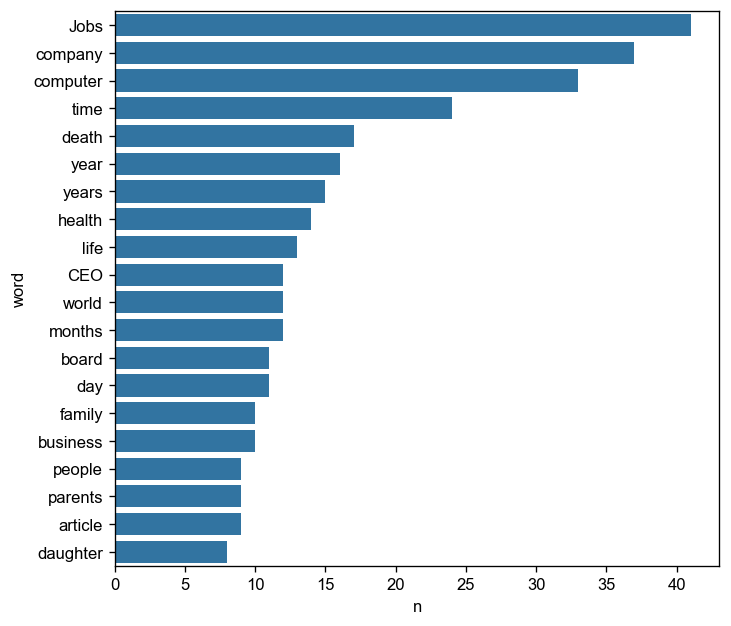

In [56]:
sns.barplot(data = top20, y='word', x='n')

In [57]:
font = 'C:/Users/04-02/anaconda3/pkgs/matplotlib-base-3.5.3-py37hd77b12b_0/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf'

In [58]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'Jobs': 41,
 'company': 37,
 'computer': 33,
 'time': 24,
 'death': 17,
 'year': 16,
 'years': 15,
 'health': 14,
 'life': 13,
 'CEO': 12,
 'world': 12,
 'months': 12,
 'board': 11,
 'day': 11,
 'family': 10,
 'business': 10,
 'people': 9,
 'parents': 9,
 'article': 9,
 'daughter': 8,
 'number': 8,
 'employees': 8,
 'biography': 8,
 'design': 8,
 'products': 8,
 'news': 8,
 'leave': 7,
 'percent': 7,
 'product': 7,
 'service': 7,
 'development': 7,
 'co': 7,
 'money': 7,
 'music': 7,
 'magazine': 7,
 'electronics': 7,
 'field': 6,
 'sales': 6,
 'friends': 6,
 'father': 6,
 'address': 6,
 'film': 6,
 'man': 6,
 'introduction': 6,
 'founder': 6,
 'college': 6,
 'generation': 6,
 'email': 6,
 'deal': 6,
 'consumer': 6,
 'person': 6,
 'school': 6,
 'shares': 6,
 'touch': 5,
 'media': 5,
 'software': 5,
 'son': 5,
 'part': 5,
 'term': 5,
 'system': 5,
 'stock': 5,
 'issue': 5,
 'documentary': 5,
 'technology': 5,
 'children': 5,
 'industry': 5,
 'innovation': 5,
 'page': 5,
 'career': 5,
 

In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(random_state = 1234,          # 난수 고정
               font_path = font,             # 폰트 설정
               width = 400,                  # 가로 크기
               height = 400,                 # 세로 크기
               background_color = 'white')   # 배경색

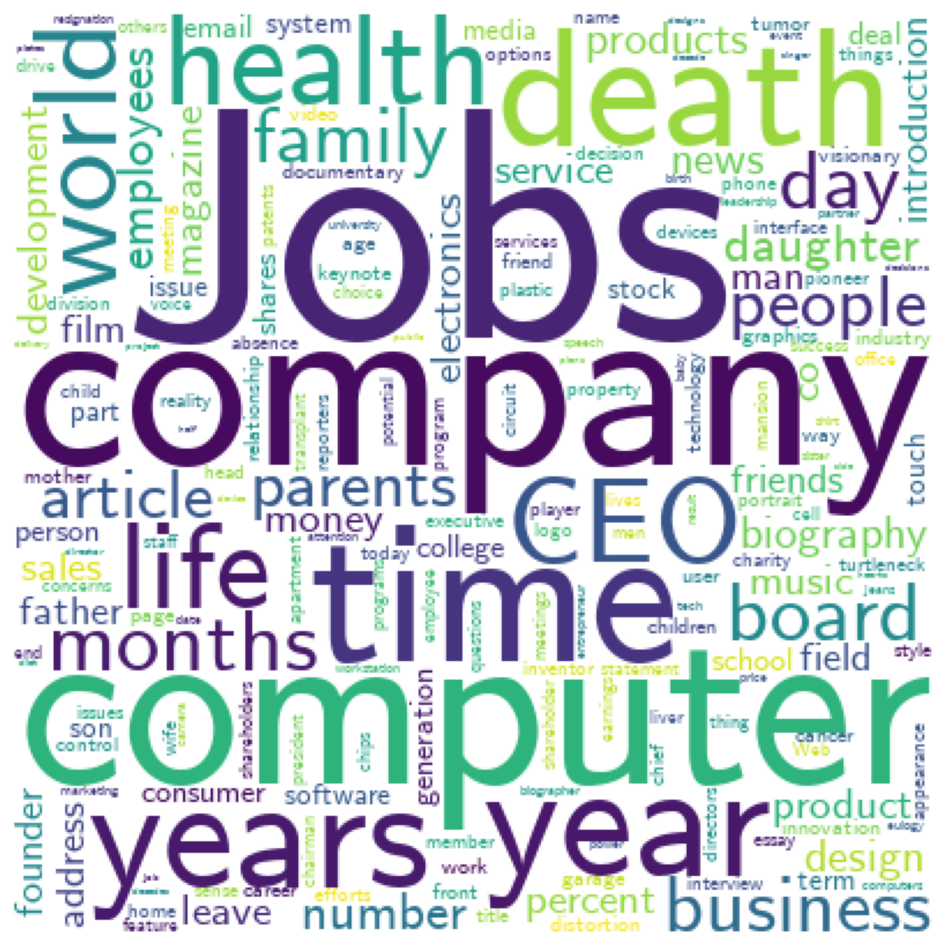

In [64]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [65]:
# mask 적용
import PIL
import PIL.Image

In [78]:
icon  = PIL.Image.open('C:/Users/04-02/Desktop/kdy/apple.png')

In [79]:
# png 파일로 mask 생성
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255,255))
img.paste(icon, icon)
img = np.array(img)

In [80]:
wc = WordCloud(random_state = 1234,          # 난수 고정
               font_path = font,             # 폰트 설정
               width = 400,                  # 가로 크기
               height = 400,                 # 세로 크기
               background_color = 'white',   # 배경색
               mask = img)                   # mask 설정

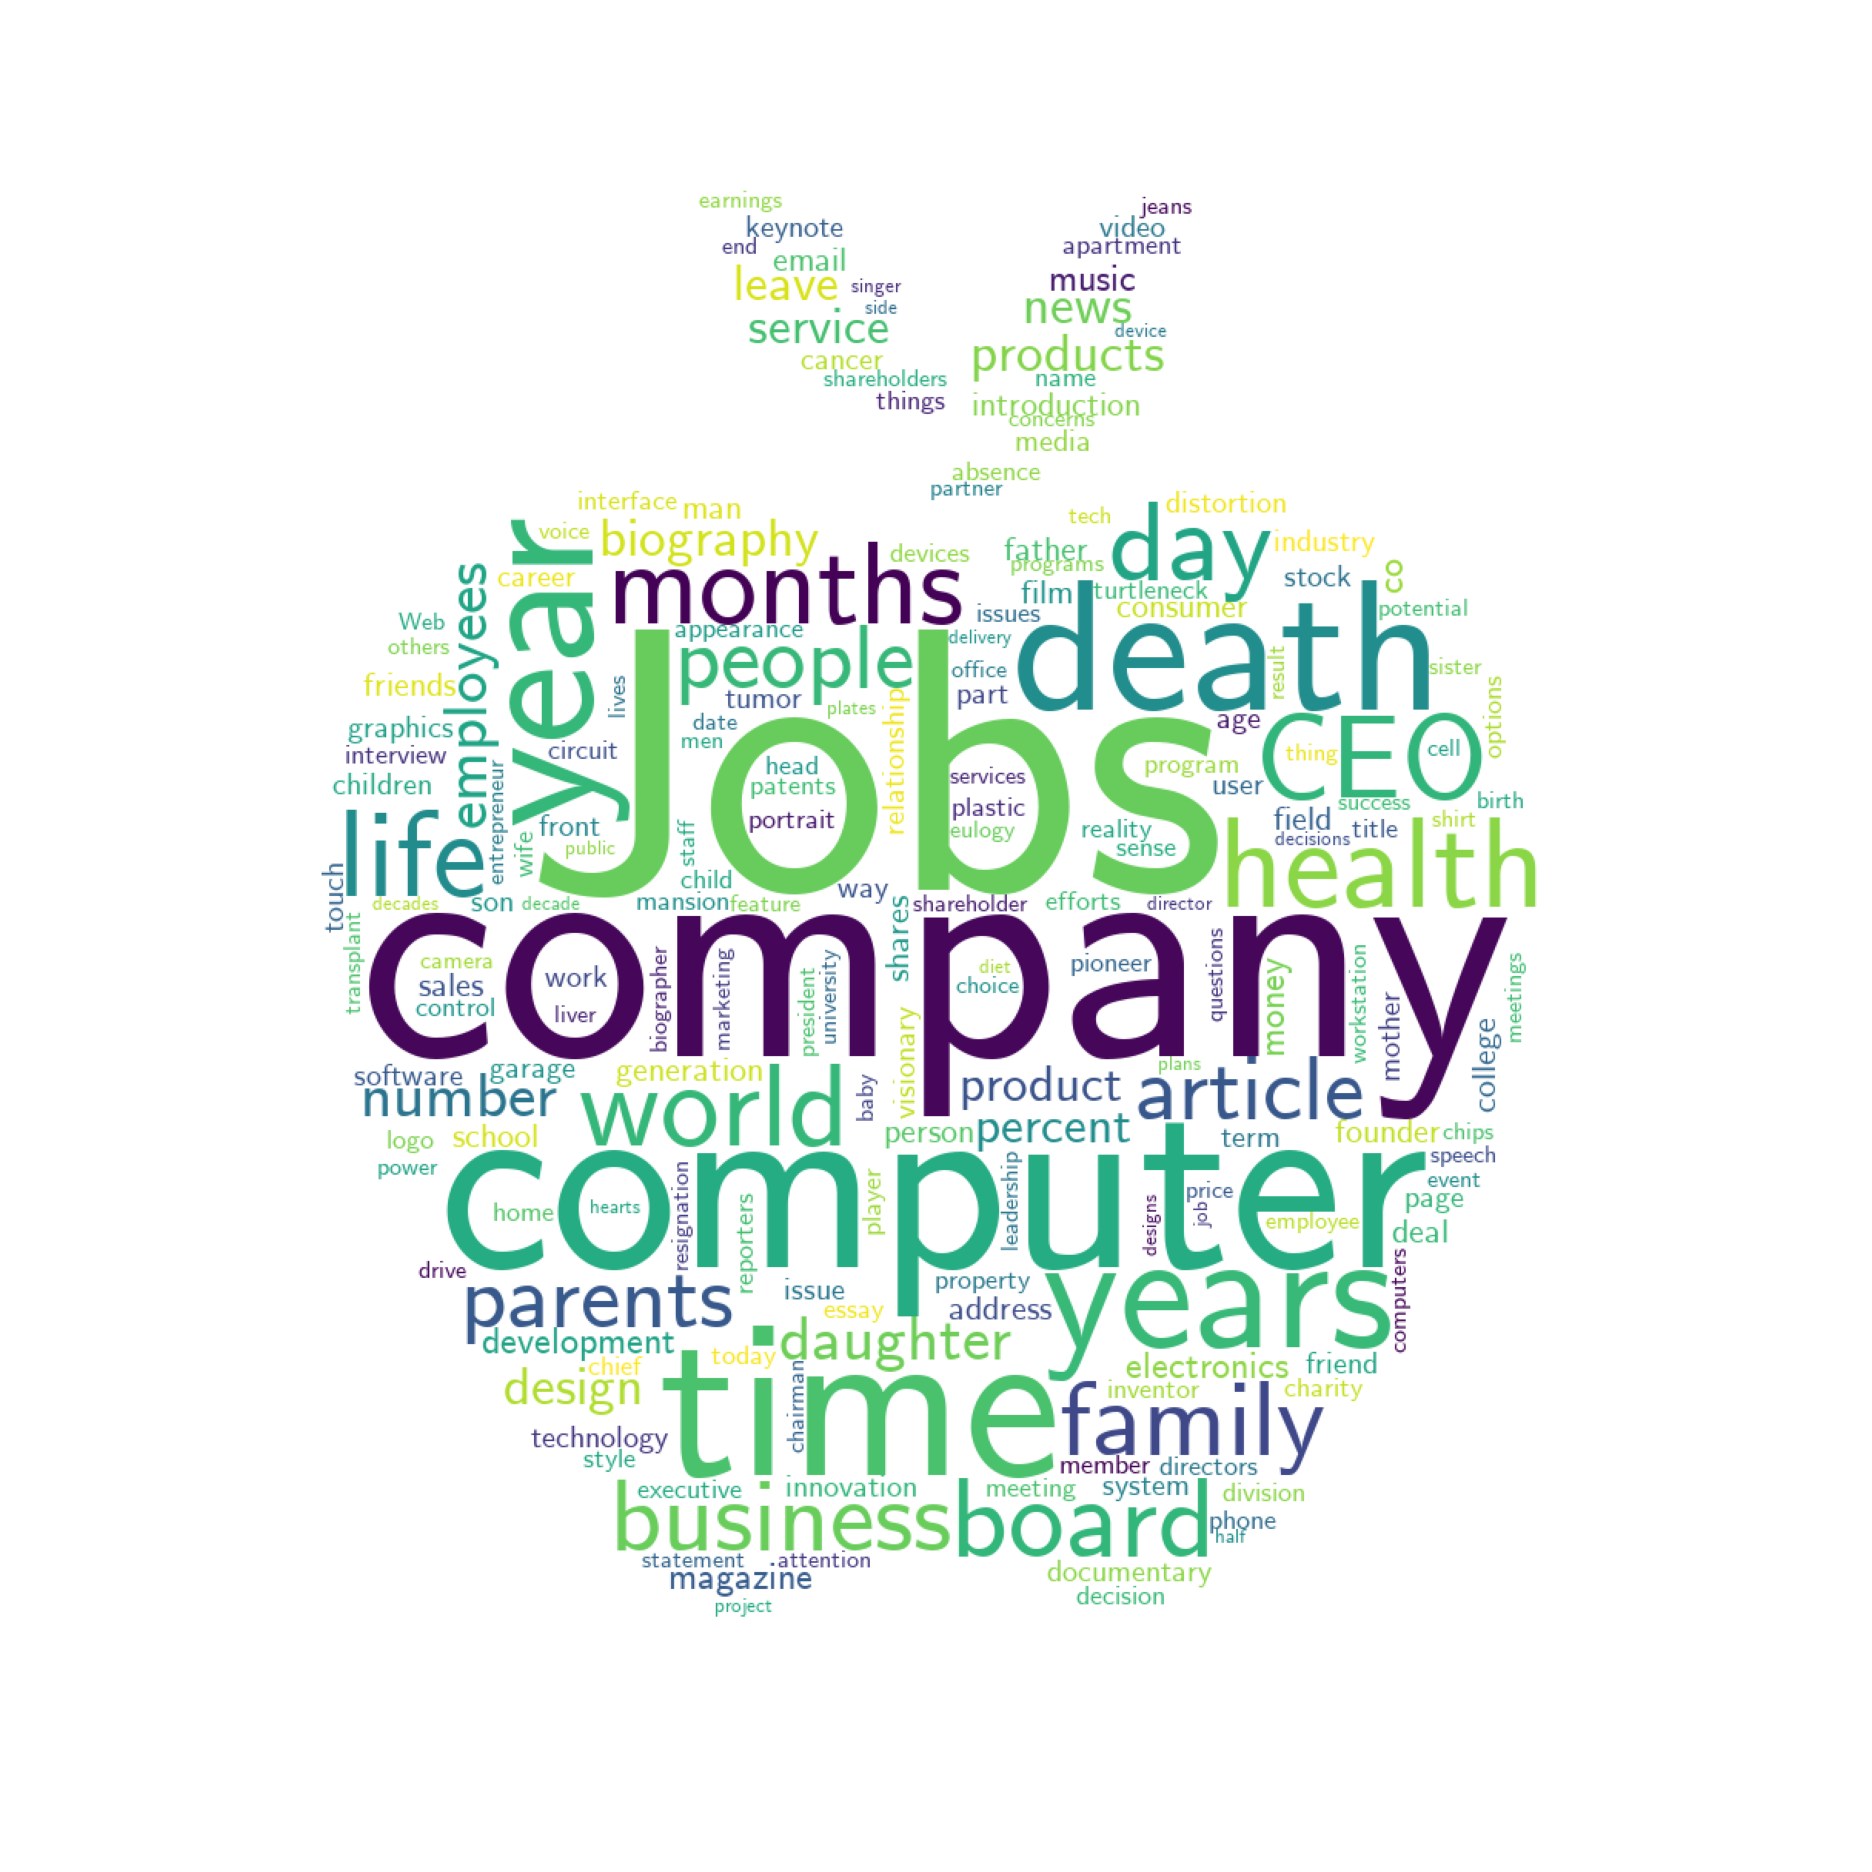

In [81]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(20,20)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [86]:
# 컬러 맵 추가
wc = WordCloud(random_state = 1234,          # 난수 고정
               font_path = font,             # 폰트 설정
               width = 400,                  # 가로 크기
               height = 400,                 # 세로 크기
               background_color = 'white',   # 배경색
               mask = img,                   # mask 설정
               colormap = 'plasma')         # 컬러 맵

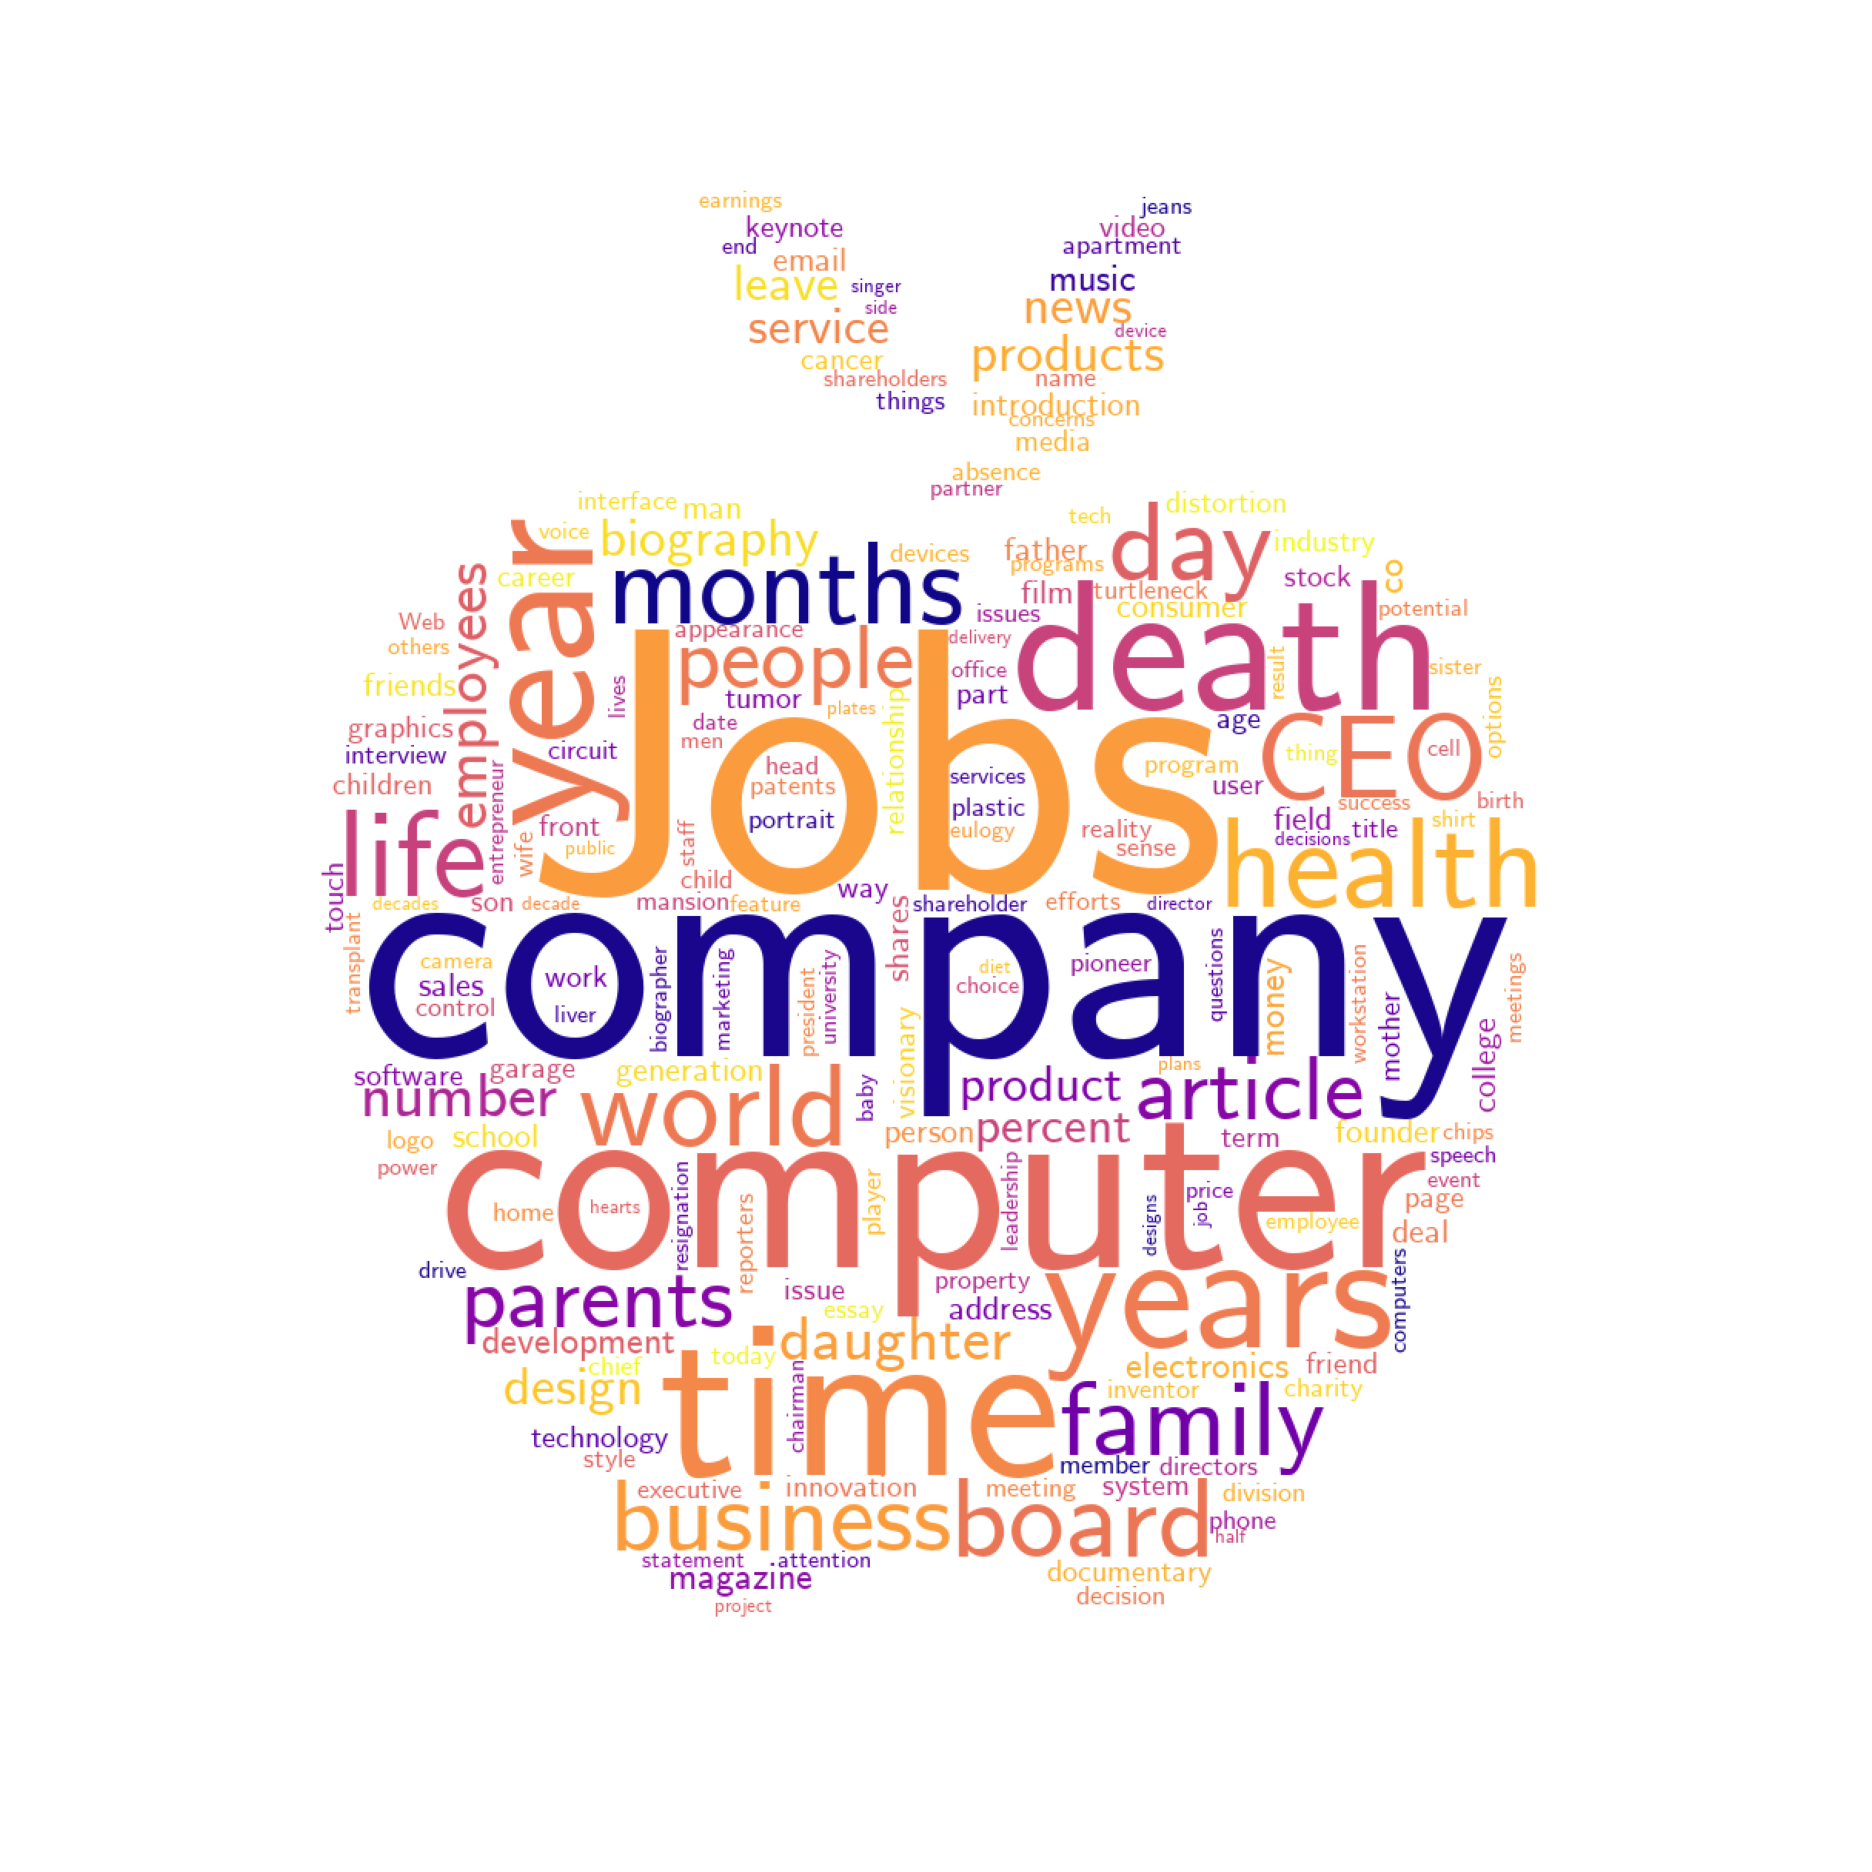

In [87]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(20,20)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)